Dataset Overview

Shape: 73,631 rows × 55 columns

Target column: Cover_Type (multi-class classification with 3 classes)

Feature types: All features are numeric (int64)

Missing values: None 

Features

Continuous variables:
Elevation, Aspect, Slope, Horizontal/Vertical Distances, Hillshade (morning/noon/afternoon), Fire Points distance

Binary/One-hot categorical variables:

Wilderness_Area1–4 (one-hot encoded wilderness types)

Soil_Type1–40 (one-hot encoded soil types)

Class Distribution

Cover_Type 3: 35,754 samples (48.6%)

Cover_Type 7: 20,510 samples (27.9%)

Cover_Type 6: 17,367 samples (23.6%)

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")

# Show first 5 rows
print(df.head())

# Show shape (rows, columns)
print("Shape of dataset:", df.shape)

# Show column names
print("Columns:", df.columns.tolist())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       3273     159     12                               300   
1       3264     137     10                               283   
2       3256     143      7                               234   
3       3268     176     16                               270   
4       3268     179     15                               270   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              55                             2863   
1                              45                             2773   
2                              37                             2713   
3                              50                             2955   
4                              50                             2925   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            233             242            138   
1            236             236            131   
2            231             239   

Class counts:
 Cover_Type
3    35754
7    20510
6    17367
Name: count, dtype: int64


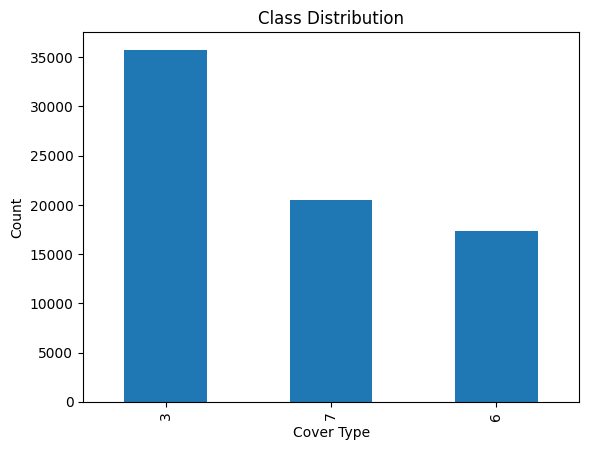

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")

# Count each class
class_counts = df['Cover_Type'].value_counts()
print("Class counts:\n", class_counts)

# Plot class distribution
class_counts.plot(kind='bar')
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


Top 10 Important Features:
 Elevation                             0.254848
Horizontal_Distance_To_Roadways       0.127851
Horizontal_Distance_To_Fire_Points    0.099037
Horizontal_Distance_To_Hydrology      0.047561
Aspect                                0.039895
Vertical_Distance_To_Hydrology        0.038429
Soil_Type38                           0.037545
Soil_Type39                           0.036301
Hillshade_9am                         0.035118
Hillshade_Noon                        0.034198
dtype: float64


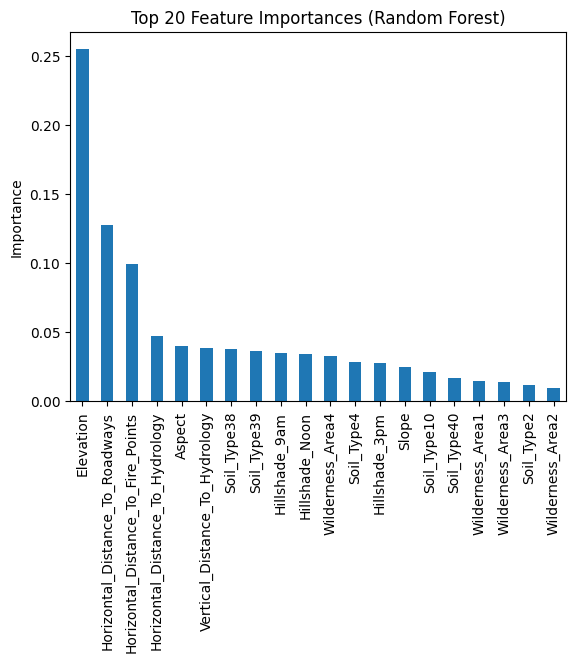

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")

# Split features and target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print top 10 features
print("Top 10 Important Features:\n", feat_imp.head(10))

# Plot feature importance
feat_imp.head(20).plot(kind="bar")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Load data
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")

# 2) Split features/target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4) Fit a RandomForest to get feature importances
rf_for_importance = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_for_importance.fit(X_train, y_train)

# 5) Pick Top-20 important features
importances = pd.Series(rf_for_importance.feature_importances_, index=X.columns)
top20_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("Top-20 features:\n", top20_features)

# 6) Reduce train/test to Top-20 features
X_train_top20 = X_train[top20_features]
X_test_top20 = X_test[top20_features]

# 7) Train a final model on Top-20 (you can swap with any classifier later)
rf_final = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_final.fit(X_train_top20, y_train)

# 8) Evaluate
y_pred = rf_final.predict(X_test_top20)
print("Accuracy (Top-20 features):", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Top-20 features:
 ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Soil_Type39', 'Soil_Type38', 'Wilderness_Area4', 'Soil_Type4', 'Hillshade_3pm', 'Slope', 'Soil_Type10', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type2', 'Wilderness_Area3', 'Wilderness_Area2']
Accuracy (Top-20 features): 0.9756230053642969

Classification report:
               precision    recall  f1-score   support

           3       0.97      0.98      0.98      7151
           6       0.96      0.93      0.95      3474
           7       1.00      1.00      1.00      4102

    accuracy                           0.98     14727
   macro avg       0.98      0.97      0.97     14727
weighted avg       0.98      0.98      0.98     14727



/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l

                 Model  Accuracy  F1-score
0  Logistic Regression  0.799688  0.791836
1        Decision Tree  0.959870  0.959823
2        Random Forest  0.972635  0.972503
3    Gradient Boosting  0.874788  0.870228


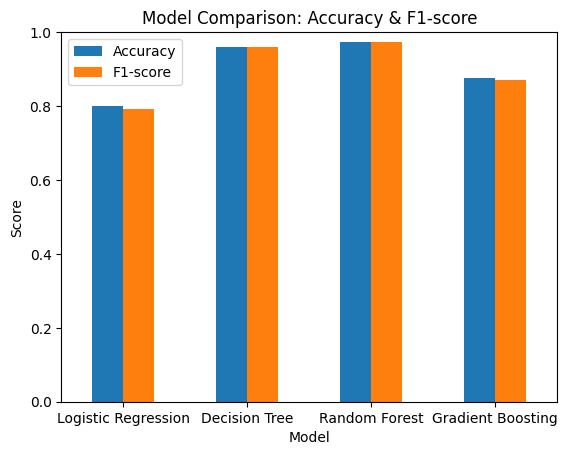

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Results in DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=0)
plt.title("Model Comparison: Accuracy & F1-score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l

                          Model  Accuracy  F1-score
0  Logistic Regression (scaled)  0.825762  0.815497
1                 Decision Tree  0.959870  0.959823
2                 Random Forest  0.972635  0.972503
3             Gradient Boosting  0.874788  0.870228


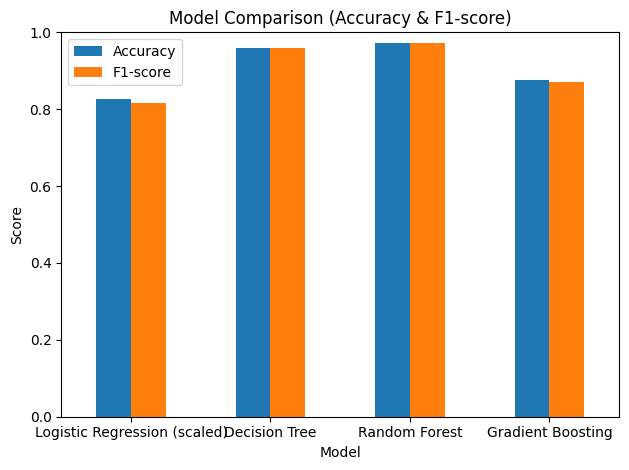

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models (scale only Logistic Regression via Pipeline)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Show results as a table
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=0)
plt.title("Model Comparison (Accuracy & F1-score)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Classification report (Random Forest):

              precision    recall  f1-score   support

           3       0.96      0.98      0.97      7151
           6       0.96      0.92      0.94      3474
           7       1.00      1.00      1.00      4102

    accuracy                           0.97     14727
   macro avg       0.97      0.97      0.97     14727
weighted avg       0.97      0.97      0.97     14727



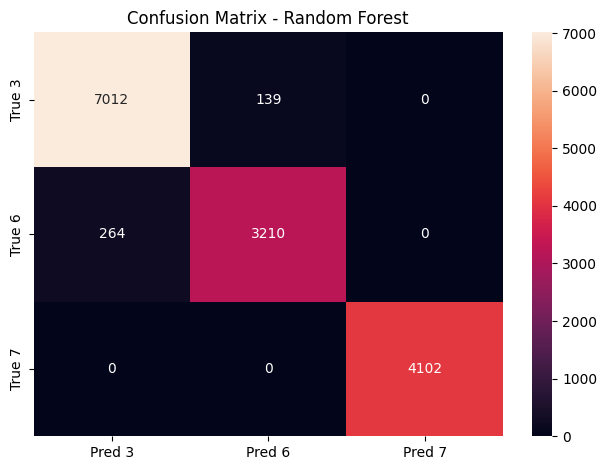

In [ ]:
# Confusion matrix + classification report for the best model (Random Forest)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train RF (same as before)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict + reports
y_pred = rf.predict(X_test)
print("Classification report (Random Forest):\n")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
cm_df = pd.DataFrame(cm, index=[f"True {c}" for c in sorted(y.unique())],
                        columns=[f"Pred {c}" for c in sorted(y.unique())])
plt.figure()
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
#  hyperparameter tuning for Random Forest
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy.stats import randint

# Load data
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Search space (small & fast)
param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": randint(10, 40),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=30,
    scoring="f1_weighted", cv=3, random_state=42, n_jobs=-1, verbose=1
)
search.fit(X_train, y_train)

print("Best params:", search.best_params_)
best_rf = search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Accuracy (tuned RF):", accuracy_score(y_test, y_pred))
print("F1-weighted (tuned RF):", f1_score(y_test, y_pred, average="weighted"))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'max_depth': 24, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 249}
Accuracy (tuned RF): 0.9799008623616486
F1-weighted (tuned RF): 0.9798522027786656


                     Model  Accuracy  F1_weighted
0  Random Forest (default)    0.9726       0.9725
1    Random Forest (tuned)    0.9799       0.9798


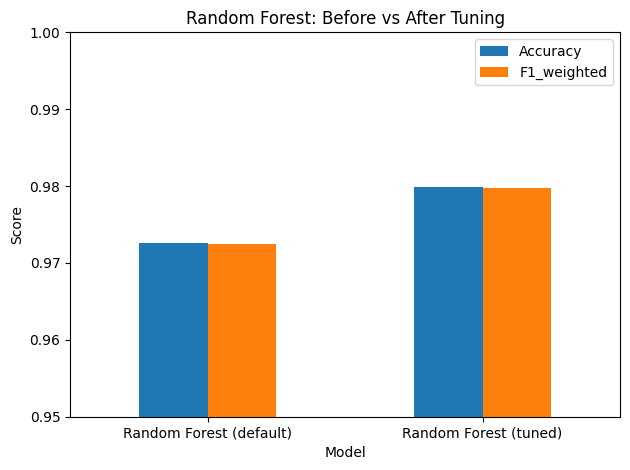

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Previous Random Forest (before tuning)
rf_before = {"Model": "Random Forest (default)", "Accuracy": 0.9726, "F1_weighted": 0.9725}

# Tuned Random Forest (after tuning)
rf_after = {"Model": "Random Forest (tuned)", "Accuracy": 0.9799, "F1_weighted": 0.9798}

# Combine into DataFrame
compare_df = pd.DataFrame([rf_before, rf_after])
print(compare_df)

# Plot
compare_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Random Forest: Before vs After Tuning")
plt.ylabel("Score")
plt.ylim(0.95, 1.0)  # zoom in to highlight improvement
plt.tight_layout()
plt.show()


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l

                          Model  Accuracy  F1-score
0  Logistic Regression (scaled)  0.815305  0.804975
1                 Decision Tree  0.957221  0.957206
2                 Random Forest  0.975759  0.975661
3             Gradient Boosting  0.872683  0.868716


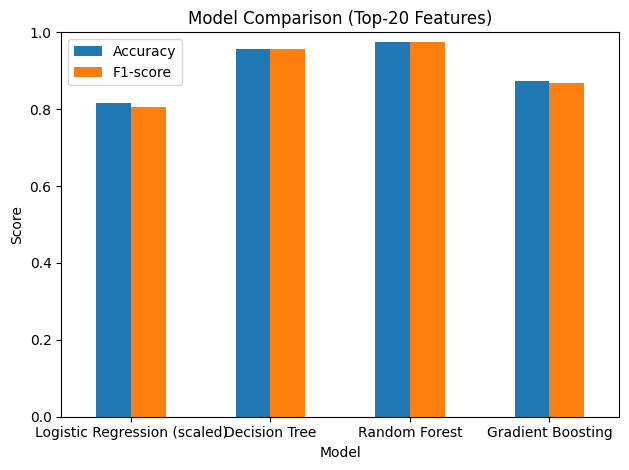

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load data
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")

# --- Use only Top-20 features (from feature importance results) ---
top20_features = [
    'Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points',
    'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology',
    'Hillshade_9am', 'Hillshade_Noon', 'Soil_Type39', 'Soil_Type38',
    'Wilderness_Area4', 'Soil_Type4', 'Hillshade_3pm', 'Slope',
    'Soil_Type10', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type2',
    'Wilderness_Area3', 'Wilderness_Area2'
]

X = df[top20_features]   # keep only top-20 features
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Models (scale only Logistic Regression)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 4) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 5) Show results
results_df = pd.DataFrame(results)
print(results_df)

# 6) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=0)
plt.title("Model Comparison (Top-20 Features)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Top-20 Features (from train only):
 ['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Soil_Type39', 'Soil_Type38', 'Wilderness_Area4', 'Soil_Type4', 'Hillshade_3pm', 'Slope', 'Soil_Type10', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type2', 'Wilderness_Area3', 'Wilderness_Area2']


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l


Results with Top-20 Features (train-only selection):
                          Model  Accuracy  F1-score
0  Logistic Regression (scaled)  0.815305  0.804975
1                 Decision Tree  0.957221  0.957206
2                 Random Forest  0.975759  0.975661
3             Gradient Boosting  0.872683  0.868716


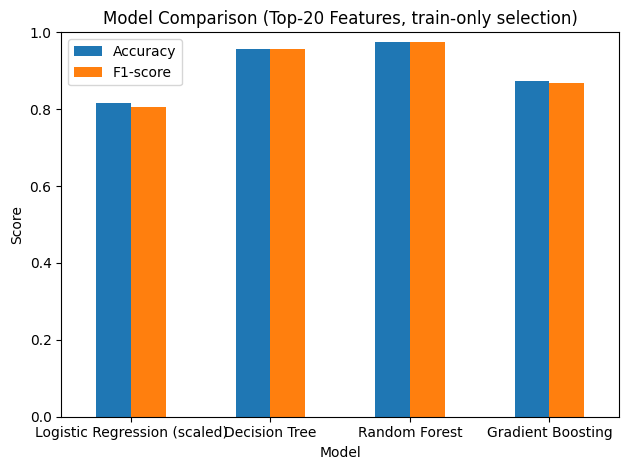

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1) Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Train a Random Forest only on training set for feature importance
rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_temp.fit(X_train, y_train)

# 4) Pick Top-20 features (from training only)
importances = pd.Series(rf_temp.feature_importances_, index=X_train.columns)
top20_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("Top-20 Features (from train only):\n", top20_features)

# 5) Subset train/test to Top-20 features
X_train_top20 = X_train[top20_features]
X_test_top20  = X_test[top20_features]

# 6) Define models
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 7) Train & evaluate
results = []
for name, model in models.items():
    model.fit(X_train_top20, y_train)
    y_pred = model.predict(X_test_top20)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

# 8) Show results
results_df = pd.DataFrame(results)
print("\nResults with Top-20 Features (train-only selection):")
print(results_df)

# 9) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind="bar", rot=0)
plt.title("Model Comparison (Top-20 Features, train-only selection)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Top-20 features (from TRAIN only):
['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Hydrology', 'Aspect', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Soil_Type39', 'Soil_Type38', 'Wilderness_Area4', 'Soil_Type4', 'Hillshade_3pm', 'Slope', 'Soil_Type10', 'Wilderness_Area1', 'Soil_Type40', 'Soil_Type2', 'Wilderness_Area3', 'Wilderness_Area2']


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l


=== Model Comparison (Top-20, train-only selection) ===
                       Model  Accuracy  F1_weighted
               Random Forest  0.975759     0.975661
               Decision Tree  0.957221     0.957206
           Gradient Boosting  0.872683     0.868716
Logistic Regression (scaled)  0.815305     0.804975

=== Classification Report (Logistic Regression (scaled)) ===
              precision    recall  f1-score   support

           3     0.7696    0.8844    0.8230      7151
           6     0.6566    0.4551    0.5376      3474
           7     1.0000    1.0000    1.0000      4102

    accuracy                         0.8153     14727
   macro avg     0.8087    0.7798    0.7869     14727
weighted avg     0.8071    0.8153    0.8050     14727


=== Classification Report (Decision Tree) ===
              precision    recall  f1-score   support

           3     0.9553    0.9566    0.9560      7151
           6     0.9105    0.9079    0.9092      3474
           7     1.0000    1.0

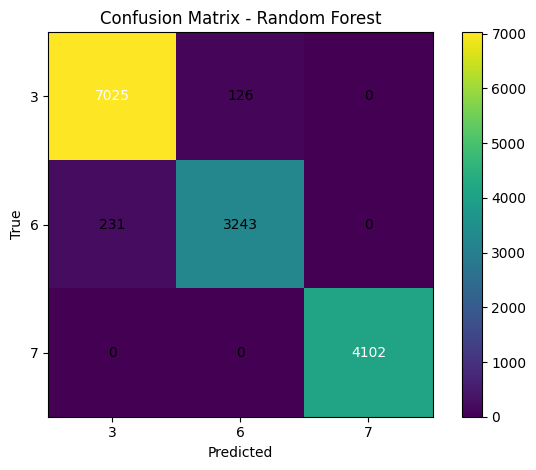

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# 1) Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Feature selection on TRAIN ONLY (prevent leakage)
rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_temp.fit(X_train, y_train)

importances = pd.Series(rf_temp.feature_importances_, index=X_train.columns)
top20_features = importances.sort_values(ascending=False).head(20).index.tolist()
print("Top-20 features (from TRAIN only):")
print(top20_features)

X_train_top = X_train[top20_features]
X_test_top  = X_test[top20_features]

# 4) Models (scale only Logistic Regression)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# 5) Train, predict, evaluate
results = []
all_reports = {}
for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    
    acc = accuracy_score(y_test, y_pred)
    f1w = f1_score(y_test, y_pred, average="weighted")
    
    results.append({"Model": name, "Accuracy": acc, "F1_weighted": f1w})
    
    # Save classification report for each model
    all_reports[name] = classification_report(y_test, y_pred, digits=4)

# 6) Show comparison table
results_df = pd.DataFrame(results).sort_values("F1_weighted", ascending=False)
print("\n=== Model Comparison (Top-20, train-only selection) ===")
print(results_df.to_string(index=False))

# 7) Print classification report for each model
for name, report in all_reports.items():
    print(f"\n=== Classification Report ({name}) ===")
    print(report)

labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred_best, labels=labels)

plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix - {best_name}")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, [str(l) for l in labels])
plt.yticks(tick_marks, [str(l) for l in labels])
plt.xlabel("Predicted")
plt.ylabel("True")

# add numbers on cells
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l


=== Model Comparison (Top-20, train-only selection) ===
                       Model  Accuracy  F1_weighted
               Random Forest  0.975759     0.975661
               Decision Tree  0.957221     0.957206
           Gradient Boosting  0.872683     0.868716
Logistic Regression (scaled)  0.815305     0.804975


<Figure size 800x400 with 0 Axes>

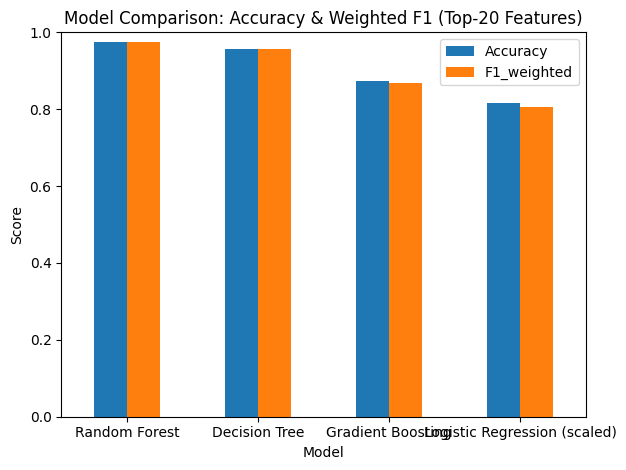


Best model: Random Forest


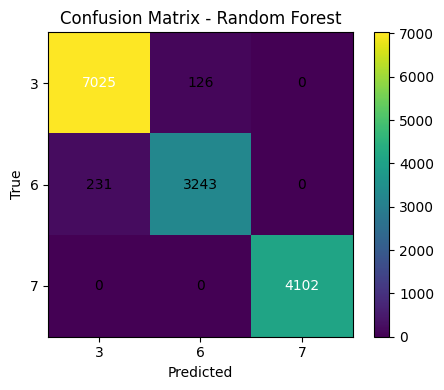


Top-20 feature importances (among Top-20):
Elevation                             0.325430
Horizontal_Distance_To_Roadways       0.129841
Horizontal_Distance_To_Fire_Points    0.096947
Horizontal_Distance_To_Hydrology      0.048900
Aspect                                0.042545
Vertical_Distance_To_Hydrology        0.041018
Hillshade_9am                         0.036653
Hillshade_Noon                        0.034635
Wilderness_Area4                      0.033850
Soil_Type4                            0.028946
Soil_Type39                           0.028087
Hillshade_3pm                         0.026898
Soil_Type38                           0.025083
Slope                                 0.024101
Soil_Type10                           0.022556
Wilderness_Area3                      0.014519
Soil_Type2                            0.011805
Wilderness_Area1                      0.011294
Wilderness_Area2                      0.008723
Soil_Type40                           0.008169
dtype: float64


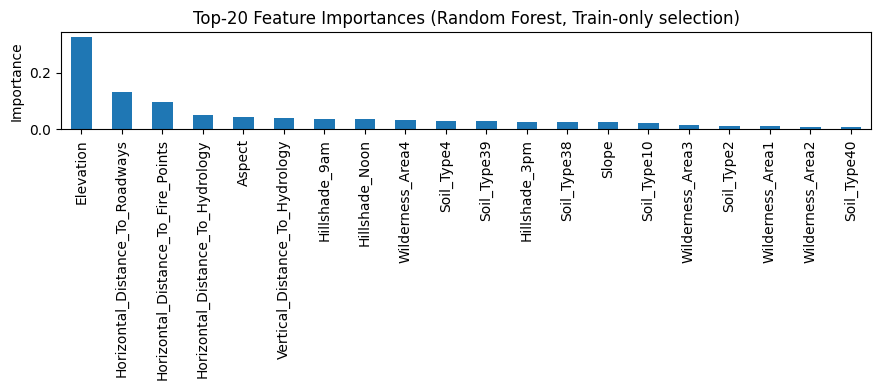

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# ---------- Load ----------
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# ---------- Split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------- Feature Selection (TRAIN ONLY) ----------
rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_temp.fit(X_train, y_train)

importances_all = pd.Series(rf_temp.feature_importances_, index=X_train.columns)
top20_features = importances_all.sort_values(ascending=False).head(20).index.tolist()

X_train_top = X_train[top20_features]
X_test_top  = X_test[top20_features]

# ---------- Models ----------
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# ---------- Train, predict, evaluate ----------
results = []
preds = {}
fitted = {}

for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    preds[name] = y_pred
    fitted[name] = model
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_weighted": f1_score(y_test, y_pred, average="weighted"),
    })

results_df = pd.DataFrame(results).sort_values("F1_weighted", ascending=False)
print("\n=== Model Comparison (Top-20, train-only selection) ===")
print(results_df.to_string(index=False))

# ---------- 1) Bar chart: Accuracy & F1 ----------
plt.figure(figsize=(8,4))
ax = results_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Model Comparison: Accuracy & Weighted F1 (Top-20 Features)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# ---------- Pick best model (by F1_weighted) ----------
best_name = results_df.iloc[0]["Model"]
best_model = fitted[best_name]
y_pred_best = preds[best_name]
print(f"\nBest model: {best_name}")

# ---------- 2) Confusion Matrix (best model) ----------
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred_best, labels=labels)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix - {best_name}")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, [str(l) for l in labels])
plt.yticks(tick_marks, [str(l) for l in labels])
plt.xlabel("Predicted")
plt.ylabel("True")

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# ---------- 3) Feature Importance chart: Top-20 ----------
# Use a RandomForest refit on the Top-20 to get importances among these features
rf_on_top20 = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_on_top20.fit(X_train_top, y_train)

imp_top20 = pd.Series(rf_on_top20.feature_importances_, index=top20_features).sort_values(ascending=False)

print("\nTop-20 feature importances (among Top-20):")
print(imp_top20)

plt.figure(figsize=(9,4))
imp_top20.plot(kind="bar")
plt.title("Top-20 Feature Importances (Random Forest, Train-only selection)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


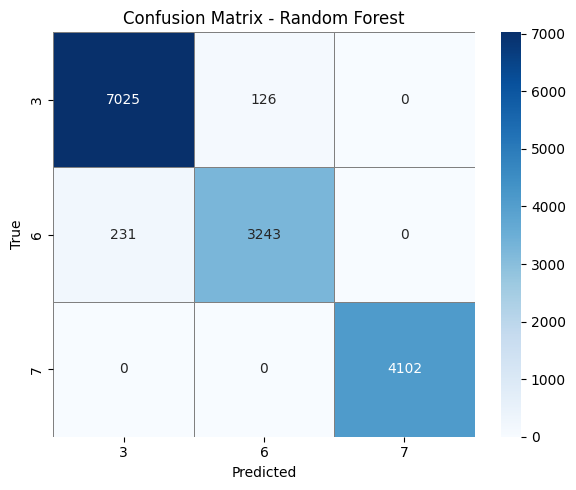

In [ ]:
import seaborn as sns

labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred_best, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=labels, yticklabels=labels, cbar=True,
            linewidths=0.5, linecolor="gray")

plt.title(f"Confusion Matrix - {best_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter space
param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": randint(10, 40),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Randomized search (30 random combos, 3-fold CV)
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring="f1_weighted",
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training (Top-20 features)
search.fit(X_train_top, y_train)

print("Best parameters:", search.best_params_)
best_rf = search.best_estimator_

# Evaluate tuned RF
y_pred_tuned = best_rf.predict(X_test_top)
print("Accuracy (tuned RF):", accuracy_score(y_test, y_pred_tuned))
print("F1-weighted (tuned RF):", f1_score(y_test, y_pred_tuned, average="weighted"))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'max_depth': 24, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 249}
Accuracy (tuned RF): 0.9791539349494126
F1-weighted (tuned RF): 0.9791058822292433


In [ ]:
# Baseline Random Forest (before tuning)
rf_default = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_default.fit(X_train_top, y_train)

y_pred_default = rf_default.predict(X_test_top)
acc_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average="weighted")

print("Default RF - Accuracy:", acc_default)
print("Default RF - F1_weighted:", f1_default)


Default RF - Accuracy: 0.9757588103483398
Default RF - F1_weighted: 0.9756611665518905


In [ ]:
# Best parameters found 
best_params = {
    "max_depth": 24,
    "max_features": None,
    "min_samples_leaf": 1,
    "min_samples_split": 5,
    "n_estimators": 249,
    "random_state": 42,
    "n_jobs": -1
}

rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train_top, y_train)

y_pred_tuned = rf_tuned.predict(X_test_top)
acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average="weighted")

print("Tuned RF - Accuracy:", acc_tuned)
print("Tuned RF - F1_weighted:", f1_tuned)


Tuned RF - Accuracy: 0.9791539349494126
Tuned RF - F1_weighted: 0.9791058822292433



=== Random Forest: Before vs After Tuning ===
                     Model  Accuracy  F1_weighted
0  Random Forest (default)  0.975759     0.975661
1    Random Forest (tuned)  0.979154     0.979106


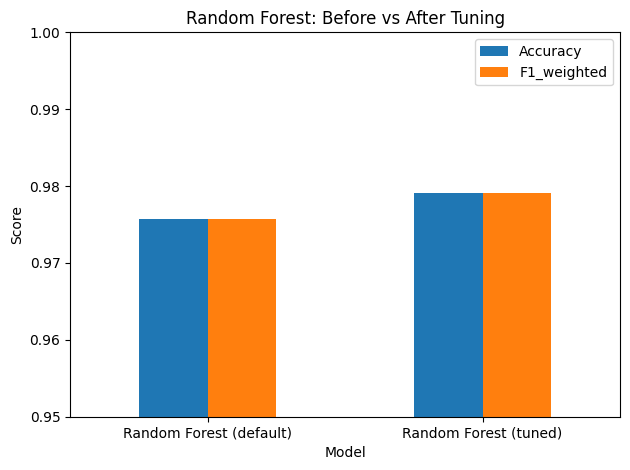

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a comparison table
compare_df = pd.DataFrame({
    "Model": ["Random Forest (default)", "Random Forest (tuned)"],
    "Accuracy": [acc_default, acc_tuned],
    "F1_weighted": [f1_default, f1_tuned]
})

print("\n=== Random Forest: Before vs After Tuning ===")
print(compare_df)

# Plot bar chart
compare_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Random Forest: Before vs After Tuning")
plt.ylabel("Score")
plt.ylim(0.95, 1.0)  # zoom in to highlight improvement
plt.tight_layout()
plt.show()


=== Classification Report (Random Forest - Default) ===
              precision    recall  f1-score   support

           3     0.9682    0.9824    0.9752      7151
           6     0.9626    0.9335    0.9478      3474
           7     1.0000    1.0000    1.0000      4102

    accuracy                         0.9758     14727
   macro avg     0.9769    0.9720    0.9744     14727
weighted avg     0.9757    0.9758    0.9757     14727


=== Classification Report (Random Forest - Tuned) ===
              precision    recall  f1-score   support

           3     0.9745    0.9828    0.9786      7151
           6     0.9640    0.9470    0.9554      3474
           7     1.0000    1.0000    1.0000      4102

    accuracy                         0.9792     14727
   macro avg     0.9795    0.9766    0.9780     14727
weighted avg     0.9791    0.9792    0.9791     14727


=== Random Forest: Before vs After Tuning ===
                     Model  Accuracy  F1_weighted
0  Random Forest (default)  0.

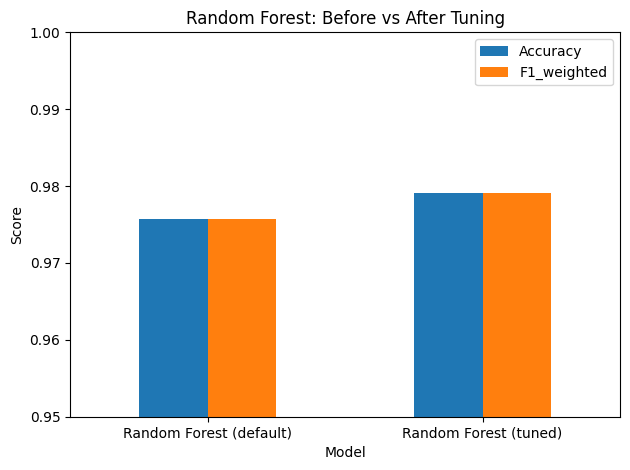

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Baseline RF (before tuning) ---
rf_default = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_default.fit(X_train_top, y_train)
y_pred_default = rf_default.predict(X_test_top)

acc_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average="weighted")
print("=== Classification Report (Random Forest - Default) ===")
print(classification_report(y_test, y_pred_default, digits=4))


# --- 2) Tuned RF (best params from RandomizedSearchCV) ---
best_params = {
    "max_depth": 24,
    "max_features": None,
    "min_samples_leaf": 1,
    "min_samples_split": 5,
    "n_estimators": 249,
    "random_state": 42,
    "n_jobs": -1
}

rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train_top, y_train)
y_pred_tuned = rf_tuned.predict(X_test_top)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average="weighted")
print("\n=== Classification Report (Random Forest - Tuned) ===")
print(classification_report(y_test, y_pred_tuned, digits=4))


# --- 3) Summary table ---
compare_df = pd.DataFrame({
    "Model": ["Random Forest (default)", "Random Forest (tuned)"],
    "Accuracy": [acc_default, acc_tuned],
    "F1_weighted": [f1_default, f1_tuned]
})
print("\n=== Random Forest: Before vs After Tuning ===")
print(compare_df)


# --- 4) Bar chart ---
compare_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Random Forest: Before vs After Tuning")
plt.ylabel("Score")
plt.ylim(0.95, 1.0)  # zoom in to highlight improvement
plt.tight_layout()
plt.show()


/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l


=== Model Comparison (Top-20 features, with SVM) ===
                       Model  Accuracy  F1_weighted
               Random Forest  0.975759     0.975661
               Decision Tree  0.957221     0.957206
           Gradient Boosting  0.872683     0.868716
Logistic Regression (scaled)  0.815305     0.804975
         Linear SVM (scaled)  0.812521     0.797503


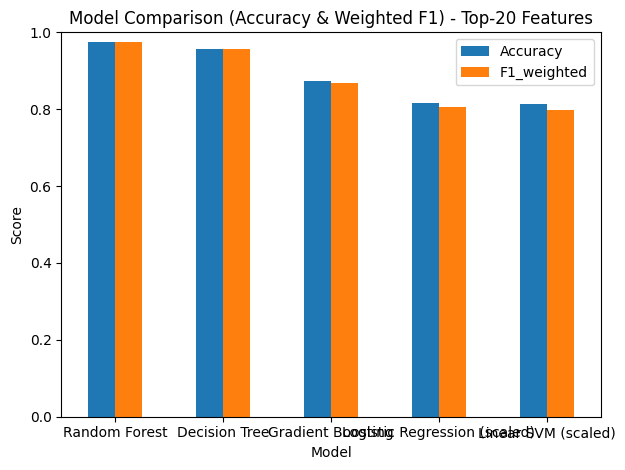

In [ ]:
#SVM (LinearSVC) + Top-20 features (train-only selection)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score

# 1) Load dataset
df = pd.read_csv("/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/final_project_groupC/Final_Proj/covertype/data/covtype_subset_3classes_named_clean.csv")
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

# 2) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Train-only feature importance -> pick Top-20 (prevent leakage)
rf_temp = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_temp.fit(X_train, y_train)
top20_features = (
    pd.Series(rf_temp.feature_importances_, index=X_train.columns)
      .sort_values(ascending=False).head(20).index.tolist()
)

X_train_top = X_train[top20_features]
X_test_top  = X_test[top20_features]

# 4) Models (scale for linear models: Logistic Regression, LinearSVC)
models = {
    "Logistic Regression (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Linear SVM (scaled)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LinearSVC(max_iter=5000))  # hinge-loss SVM, fast on large data
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# 5) Train, predict, evaluate
results = []
for name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred = model.predict(X_test_top)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1_weighted": f1_score(y_test, y_pred, average="weighted"),
    })

# 6) Show results
results_df = pd.DataFrame(results).sort_values("F1_weighted", ascending=False)
print("\n=== Model Comparison (Top-20 features, with SVM) ===")
print(results_df.to_string(index=False))

# 7) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Model Comparison (Accuracy & Weighted F1) - Top-20 Features")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_top, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train_top.columns)
print(importances.sort_values(ascending=False).head(10))


Elevation                             0.325430
Horizontal_Distance_To_Roadways       0.129841
Horizontal_Distance_To_Fire_Points    0.096947
Horizontal_Distance_To_Hydrology      0.048900
Aspect                                0.042545
Vertical_Distance_To_Hydrology        0.041018
Hillshade_9am                         0.036653
Hillshade_Noon                        0.034635
Wilderness_Area4                      0.033850
Soil_Type4                            0.028946
dtype: float64


In [ ]:
from sklearn.inspection import permutation_importance

# Check feature importance for Type 7 only
perm = permutation_importance(rf, X_test_top, y_test, scoring="f1_macro", n_repeats=5, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=X_test_top.columns)
print("Permutation Importances (Type 7 focus):")
print(perm_importances.sort_values(ascending=False).head(10))


Permutation Importances (Type 7 focus):
Elevation                             0.428809
Horizontal_Distance_To_Fire_Points    0.104071
Horizontal_Distance_To_Roadways       0.096441
Horizontal_Distance_To_Hydrology      0.048727
Soil_Type10                           0.034496
Vertical_Distance_To_Hydrology        0.034101
Hillshade_9am                         0.023816
Aspect                                0.022785
Wilderness_Area4                      0.022213
Soil_Type4                            0.016261
dtype: float64


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Make binary labels: 1 if Cover_Type == 7, else 0
y_train_7 = (y_train == 7).astype(int)
y_test_7 = (y_test == 7).astype(int)

# Train Random Forest (binary classification)
rf_7 = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_7.fit(X_train_top, y_train_7)

# Get feature importances
importances_7 = pd.Series(rf_7.feature_importances_, index=X_train_top.columns)
top_features_7 = importances_7.sort_values(ascending=False).head(10)

print("Top features distinguishing Cover Type 7 vs others:")
print(top_features_7)


Top features distinguishing Cover Type 7 vs others:
Elevation                             0.501545
Horizontal_Distance_To_Roadways       0.130471
Soil_Type39                           0.060824
Horizontal_Distance_To_Fire_Points    0.058139
Soil_Type38                           0.054085
Wilderness_Area4                      0.051889
Wilderness_Area1                      0.024502
Horizontal_Distance_To_Hydrology      0.020586
Soil_Type40                           0.019595
Wilderness_Area2                      0.018723
dtype: float64


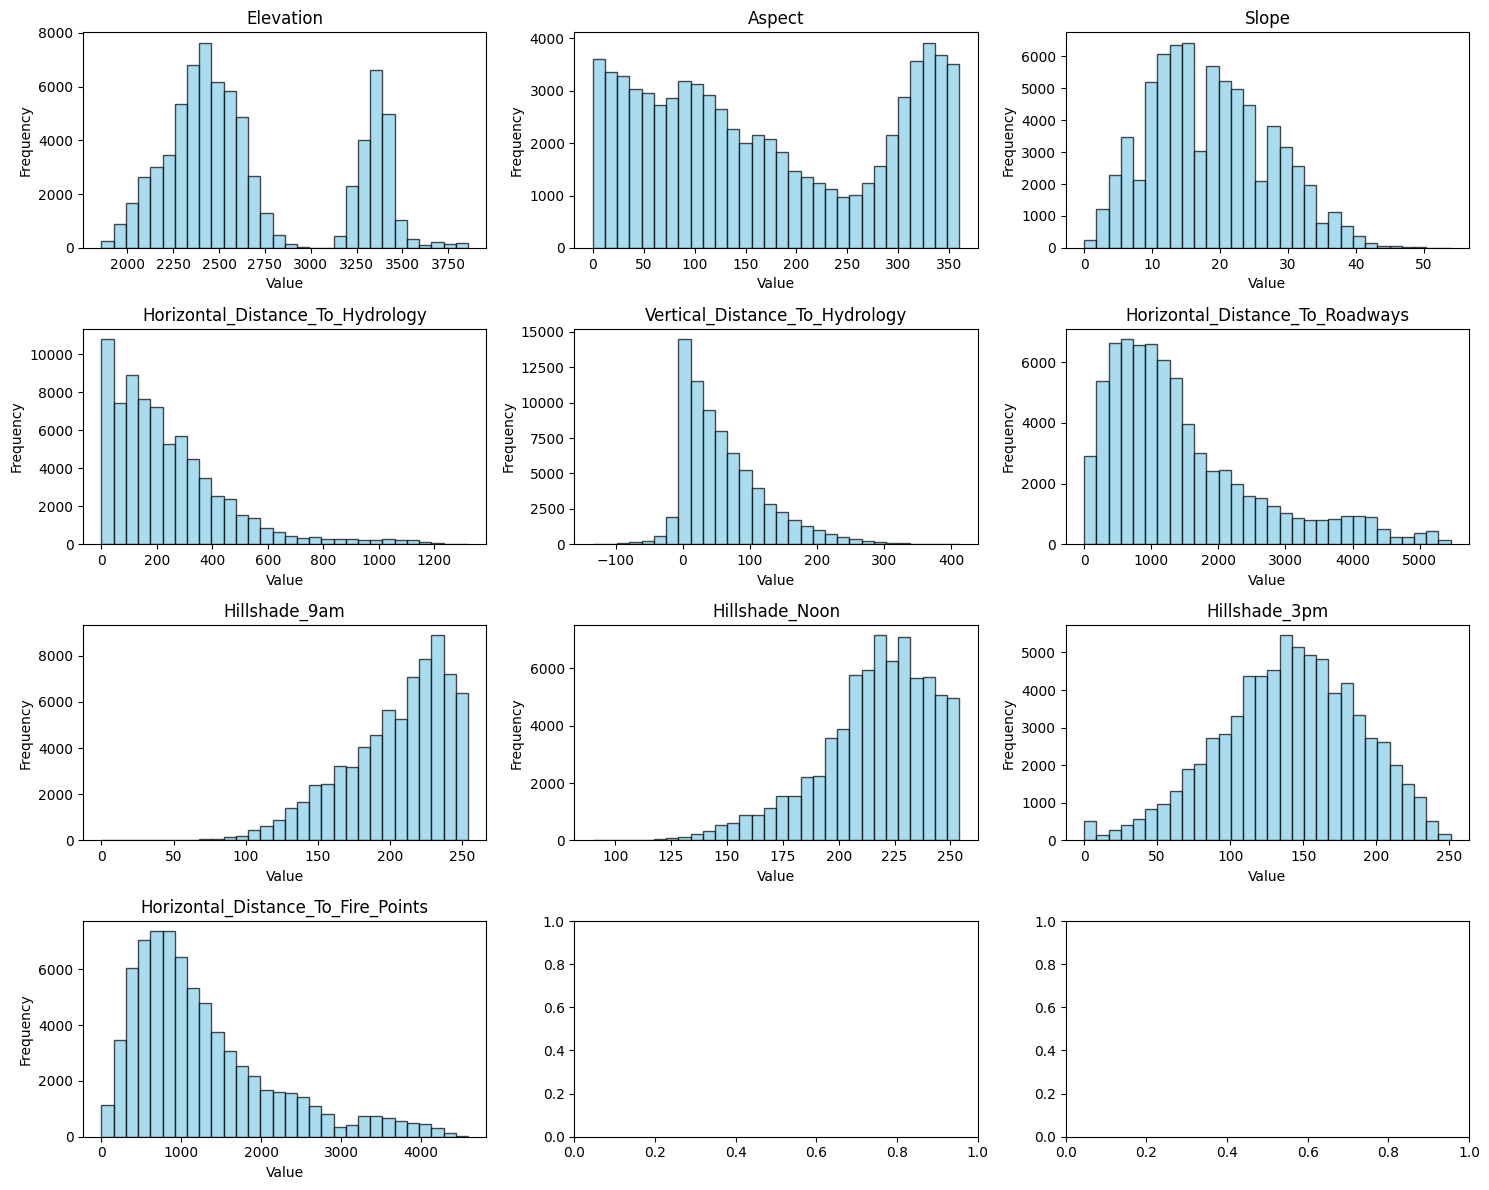

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# List of features to plot
features = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()  # Flatten the 2D array of axes

# Plot histograms for each feature
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')



plt.tight_layout()
plt.show()

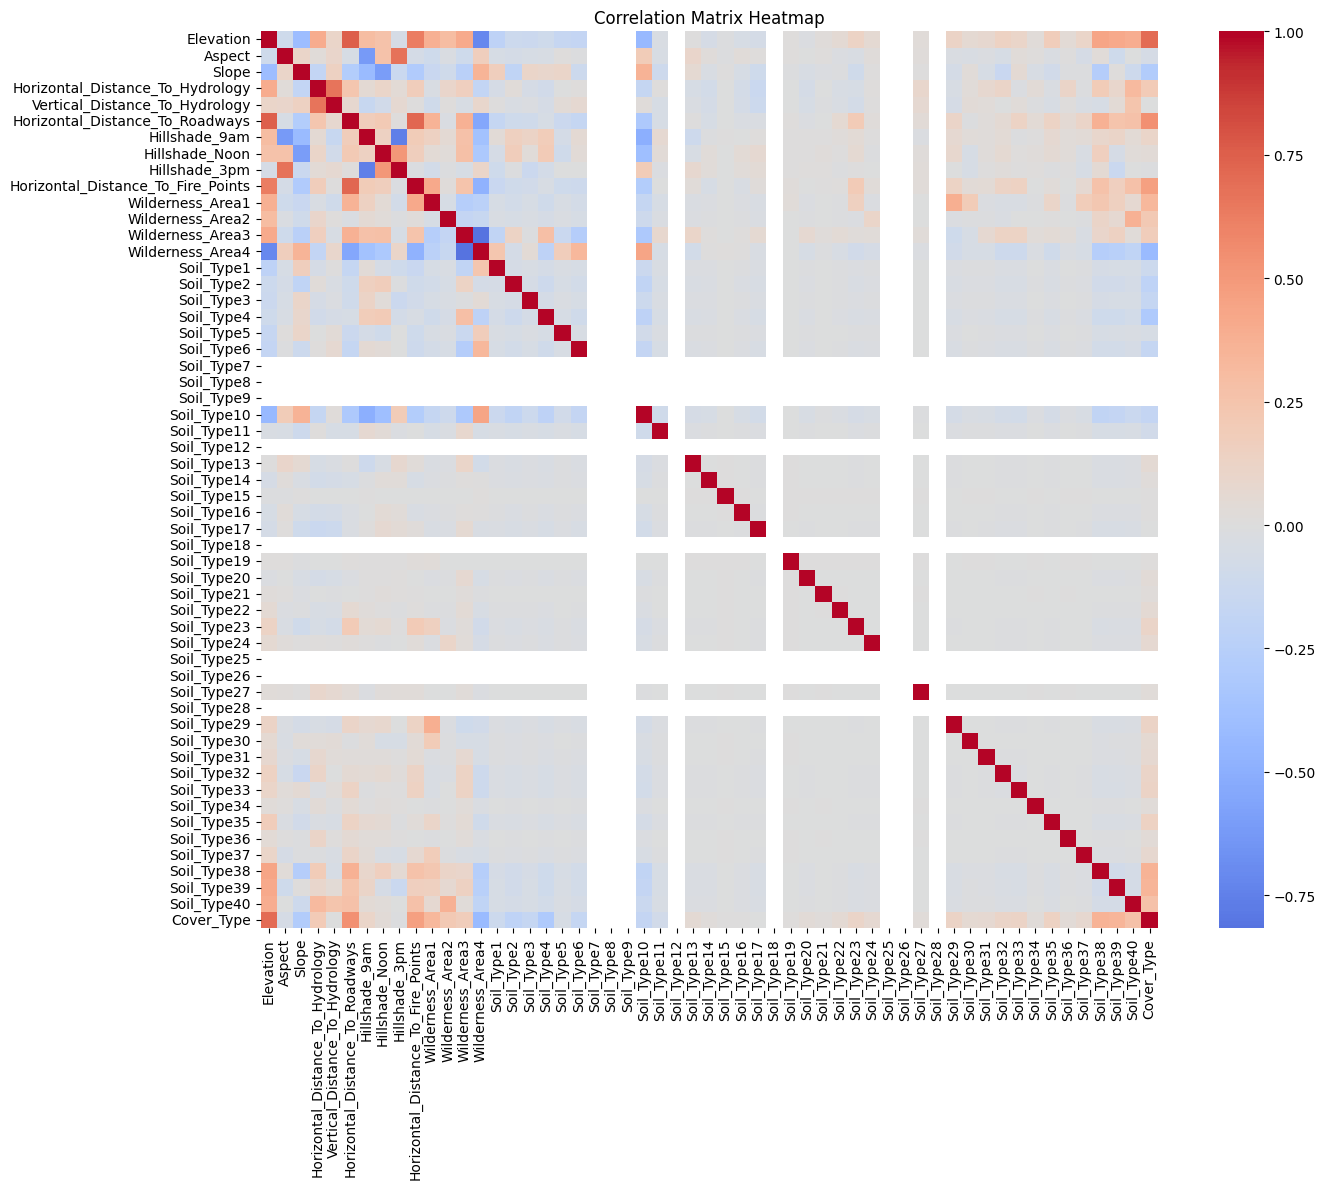

In [ ]:
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(15, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',
            center=0, square=True)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
#cover_type = {
#              3:'Ponderosa_Pine',
#              6:'Douglas_fir',
#              7:'Krummholz'
#             }

# Map the integers to their names
#df_updated=df
#df_updated['Cover_Type_Name'] = df_updated['Cover_Type'].map(cover_type)
#cover_type_dummies = pd.get_dummies(df_updated['Cover_Type_Name'])
#df_updated = pd.concat([df_updated.drop('Cover_Type_Name', axis=1), cover_type_dummies], axis=1)

# Correlation matrix
#correlation_matrix_updated = df_updated.corr()

#plt.figure(figsize=(15, 12))
#sns.heatmap(correlation_matrix_updated, annot=False, cmap='coolwarm',
#            center=0, square=True)
#plt.title('Correlation Matrix Heatmap with Sepearated Covertype')
#plt.tight_layout()
#plt.show()

/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/putuu/Documents/Github_Repo/.venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/Users/putuu/Documents/Github_Repo/.venv/l


=== Classification Report (TRAIN) - Logistic Regression ===
              precision    recall  f1-score   support

           3     0.7541    0.8753    0.8102     28603
           6     0.6186    0.4142    0.4962     13893
           7     0.9980    0.9976    0.9978     16408

    accuracy                         0.8006     58904
   macro avg     0.7902    0.7624    0.7681     58904
weighted avg     0.7901    0.8006    0.7884     58904


=== Classification Report (TEST) - Logistic Regression ===
              precision    recall  f1-score   support

           3     0.7495    0.8730    0.8066      7151
           6     0.6070    0.3993    0.4817      3474
           7     0.9949    0.9976    0.9962      4102

    accuracy                         0.7960     14727
   macro avg     0.7838    0.7566    0.7615     14727
weighted avg     0.7843    0.7960    0.7828     14727


=== Classification Report (TRAIN) - Decision Tree ===
              precision    recall  f1-score   support

       

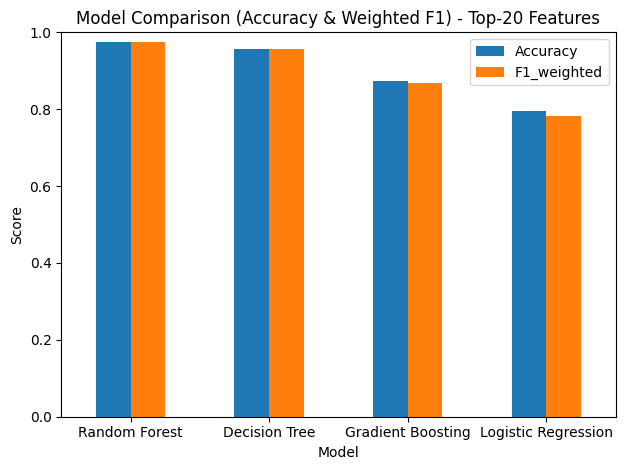

In [ ]:
#according to Tr. Myo's comments and suggestions
#overfitting issue

from sklearn.metrics import classification_report

# 5) Train, predict, evaluate (with train & test reports)
results = []
for name, model in models.items():
    model.fit(X_train_top, y_train)
    
    # --- Predictions ---
    y_pred_train = model.predict(X_train_top)
    y_pred_test  = model.predict(X_test_top)
    
    # --- Scores ---
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_test  = f1_score(y_test, y_pred_test, average="weighted")
    
    results.append({
        "Model": name,
        "Accuracy": acc_test,
        "F1_weighted": f1_test,
    })
    
    # --- Reports ---
    print(f"\n=== Classification Report (TRAIN) - {name} ===")
    print(classification_report(y_train, y_pred_train, digits=4))
    
    print(f"\n=== Classification Report (TEST) - {name} ===")
    print(classification_report(y_test, y_pred_test, digits=4))

# 6) Show results
results_df = pd.DataFrame(results).sort_values("F1_weighted", ascending=False)
print("\n=== Model Comparison (Top-20 features, with SVM) ===")
print(results_df.to_string(index=False))

# 7) Plot comparison
results_df.set_index("Model")[["Accuracy", "F1_weighted"]].plot(kind="bar", rot=0)
plt.title("Model Comparison (Accuracy & Weighted F1) - Top-20 Features")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
